# Distributions

In [22]:
import thinkstats2
import thinkplot
import nsfg
import math

hist=thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [2]:
hist.Freq(2)

2

### Histograms

they are graphs that show the relationship between the frequency of a value and the value

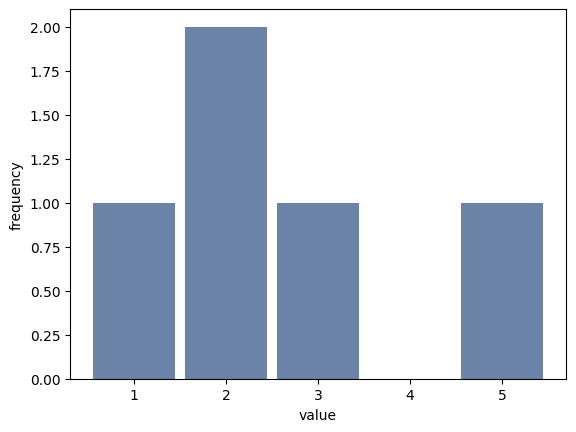

<Figure size 800x600 with 0 Axes>

In [3]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value',ylabel="frequency")

In [4]:
preg=nsfg.ReadFemPreg()
live=preg[preg["outcome"]==1]
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,NaN,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,NaN,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


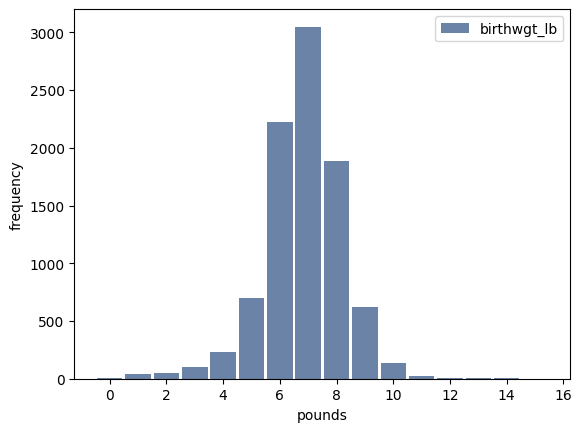

<Figure size 800x600 with 0 Axes>

In [5]:
hist=thinkstats2.Hist(live["birthwgt_lb"],label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds',ylabel='frequency')


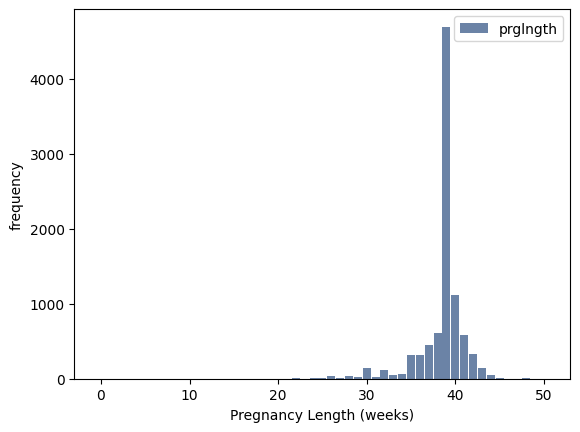

<Figure size 800x600 with 0 Axes>

In [6]:
hist=thinkstats2.Hist(live["prglngth"],label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Pregnancy Length (weeks)',ylabel='frequency')

#### Outliers

outliers are extreme values the might be errors in mesurement

we select the top 10 highest and lowest values to check if there might be outliers

In [7]:
for weeks,freq in hist.Smallest(10):
    print(weeks,freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [8]:
for weeks,freq in hist.Largest(10):
    print(weeks,freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


the way of knowing if there are outliers if domain knoledge or the type of analisis you are trying to make

In [9]:
len(preg.columns)

244

#### Histogram of weeks of pregnancy of first child vs consecutive childs greater than 1

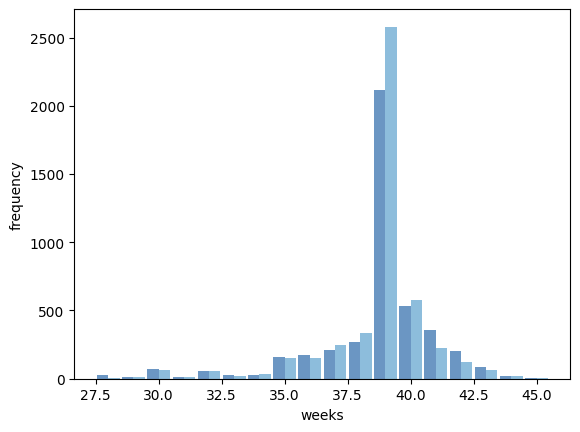

<Figure size 800x600 with 0 Axes>

In [10]:
firsts=live[(live["birthord"]==1) & (live["prglngth"]>27) & (live["prglngth"]<46)]
others=live[(live["birthord"]!=1) & (live["prglngth"]>27) & (live["prglngth"]<46)]

first_hist=thinkstats2.Hist(firsts["prglngth"])
other_hist=thinkstats2.Hist(others["prglngth"])

width=0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist,align="right",width=width)
thinkplot.Hist(other_hist,align="left",width=width)
thinkplot.Show(xlabel="weeks",ylabel="frequency")

#### Variance AND Standard deviation

how to calculate  variance and standard deviation manually or using built in function

In [18]:
firstsMean=firsts["prglngth"].mean()
othersMean=others["prglngth"].mean()


firstVariance=0
othersVariance=0

firstsLen=len(firsts["prglngth"])
othersLen=len(others["prglngth"])

for element in firsts["prglngth"]:
    deviation=element-firstsMean
    deviationSquared=deviation**2
    firstVariance=firstVariance+deviationSquared
    
firstVariance=firstVariance/firstsLen
othersVariance=others["prglngth"].var()

firstStd=firsts["prglngth"].std()
othersStd=others["prglngth"].std()

print("The mean for first pregnancy is: ",firstsMean)
print("The mean for non first time pregnancies is: ",othersMean)

print("The variance for first pregnancy is: ",firstVariance)
print("The variance for non first time pregnancies is: ",othersVariance)

print("The standard deviation for pregnancy is: ",firstStd)
print("The standard deviation for non first time pregnancies is: ",othersStd)
    

The mean for first pregnancy is:  38.70308571428571
The mean for non first time pregnancies is:  38.64000853060354
The variance for first pregnancy is:  5.924413335510434
The variance for non first time pregnancies is:  4.575583276377725
The standard deviation for pregnancy is:  2.434289998484339
The standard deviation for non first time pregnancies is:  2.139061307297602


### Effect Size

summary statistic intended to describe the size of an effect. For example to describe the difference between two groups. Cohens d is used to compare this difference

In [23]:
diff=firstsMean-othersMean
pooled_var=(firstVariance*firstsLen+othersVariance*othersLen)/(firstsLen+othersLen)
d=diff/math.sqrt(pooled_var)
print("Cohens d is: ",d)


Cohens d is:  0.027590604398540896


#### Conclusion
Based on the evidence found , first babies dont come late. We got to this conclusion using different methods. First we separated de data in two datasets, the first encompases the data from 1st pregnancies , the second dataset has the data for pregnancies other than the first. For each of this data sets we graphed a histogram of the frequency of the weeks of pregnancy. The graph which is shown above shows a couple of important things, we first see a kind of normal distribution in the data , and second we that both data sets hace their peak frequencies arround the 39 weeks mark. This means that most pregnancies are around 39 weeks, no matter if they are first pregnancies or consecutive pregnancies. After this we calculated the mean of both data sets for the pregnancy length column, The mean for the length of first pregnancies was 38.7, the mean of the length of pregnancies other than the first was 38.6. A very small differences between to means , but to make shure that the small difference is not decieving we calculated cohens d , which resulted in 0.027, an almost negliable effect.